In [2]:
!python run_preds.py -c testing_files\cfgs\json_cfg.json

Загружаю датасет
Датасет загружен
количество tp изображений: 527
количество tp изображений: 527

Имя модели: pruned_sp55.h5
Прогон тестового набора...

Имя модели: pruned_sp60.h5
Прогон тестового набора...

Имя модели: pruned_sp65.h5
Прогон тестового набора...

Имя модели: pruned_sp70.h5
Прогон тестового набора...

Имя модели: pruned_sp75.h5
Прогон тестового набора...

Имя модели: pruned_sp80.h5
Прогон тестового набора...
2021-05-07 12:33:32.823761: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-05-07 12:33:41.224388: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-07 12:33:41.225915: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-05-07 12:33:41.262485: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA 

In [3]:
!python check_pred_data.py -c testing_files\cfgs\json_cfg.json

Предикты модели pruned_sp55
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели pruned_sp60
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели pruned_sp65
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели pruned_sp70
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели pruned_sp75
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели pruned_sp80
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
2021-05-07 12:37:27.431253: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll


In [4]:
!python calculate_metrics.py -c testing_files\cfgs\json_cfg.json

    Произвожу расчет порога модели pruned_sp55^
     Загружаю данные...
     Произвожу расчет и оценку...
[519, 8, 0, 527]
     Сохранение результатов
    Произвожу расчет порога модели pruned_sp60^
     Загружаю данные...
     Произвожу расчет и оценку...
[494, 33, 0, 527]
     Сохранение результатов
    Произвожу расчет порога модели pruned_sp65^
     Загружаю данные...
     Произвожу расчет и оценку...
[473, 54, 0, 527]
     Сохранение результатов
    Произвожу расчет порога модели pruned_sp70^
     Загружаю данные...
     Произвожу расчет и оценку...
[511, 16, 0, 527]
     Сохранение результатов
    Произвожу расчет порога модели pruned_sp75^
     Загружаю данные...
     Произвожу расчет и оценку...
[523, 4, 3, 524]
     Сохранение результатов
    Произвожу расчет порога модели pruned_sp80^
     Загружаю данные...
     Произвожу расчет и оценку...
[522, 5, 49, 478]
     Сохранение результатов
    Произвожу расчет roc модели pruned_sp55
     Загружаю данные...
     Произвожу расчет 

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import utils

In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('testing_files\\10_tiny\\models_h5\\10_pr55.h5')
model_pr = tf.keras.models.load_model('testing_files\\10_tiny\\models_h5\\model_epoch-2566.h5')

In [11]:
layer_test = model.layers[8]

In [12]:
layer_test.count_params()

144

In [4]:
model_pr.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
depthwise_conv2d_127 (Depthwise (None, 64, 64, 1)    9           input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_254 (BatchN (None, 64, 64, 1)    4           depthwise_conv2d_127[0][0]       
__________________________________________________________________________________________________
re_lu_127 (ReLU)                (None, 64, 64, 1)    0           batch_normalization_254[0][0]    
____________________________________________________________________________________________

In [62]:
model_dir = 'testing_files\\final_64_q\\models'
output_dir = 'testing_files\\final_64_q\\tflite_models'
model_names = os.listdir(model_dir)

In [63]:
for model_name in model_names:
    model_path = os.path.join(model_dir, model_name)
    with tfmot.quantization.keras.quantize_scope():
        loaded_model = tf.keras.models.load_model(keras_quantized_model_file)
    converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    quantized_tflite_model = converter.convert()
    model_output_name = model_name.split('.')[0] + '.tflite'
    with open(os.path.join(output_dir, model_output_name), 'wb') as f:
        f.write(quantized_tflite_model)

 (showing 5 of 165). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmp7uc6x3eg\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmp7uc6x3eg\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmpkfaot2kq\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmpkfaot2kq\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmpf3041idc\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmpf3041idc\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmp1t2tdb_v\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmp1t2tdb_v\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmp9cyw1yuh\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmp9cyw1yuh\assets
INFO:tensorflow:Assets written to: C:\

KeyboardInterrupt: 

In [14]:
keras_quantized_model_file = 'testing_files\\final_64_q\\models\\model_epoch-01.h5'
with tfmot.quantization.keras.quantize_scope():
    loaded_model = tf.keras.models.load_model(keras_quantized_model_file)

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmpaq40a8k9\assets
INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmpaq40a8k9\assets


In [3]:
model_path = 'testing_files\\10_tiny\\models\\model_epoch-2566.h5'
model = tf.keras.models.load_model(model_path)
out_path = 'testing_files\\10_tiny\\models\\model_epoch-2566_q.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()
with open(out_path, 'wb') as f:
  f.write(quantized_tflite_model)

INFO:tensorflow:Assets written to: C:\Users\aztek\AppData\Local\Temp\tmpz8pxc1j6\assets


In [3]:
tf.__version__

'2.4.0'

In [14]:
input_mat = np.zeros((1,12,12,1))
one = np.ones((1,6,12,1))
input_mat[:,3:9, :, :] = one

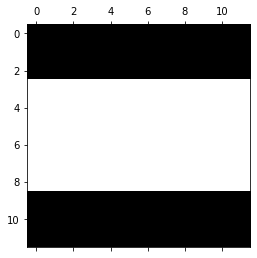

In [15]:
plt.matshow(input_mat[0,:,:,0], cmap='gray')

<Figure size 432x288 with 0 Axes>

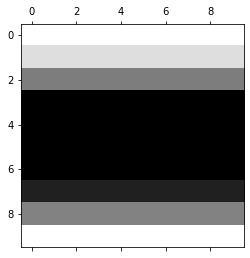

<Figure size 432x288 with 0 Axes>

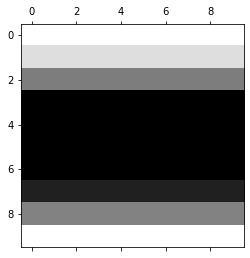

In [16]:
x = tf.keras.layers.Conv2D(2, (3,3))(input_mat)
plt.figure()
plt.matshow(x[0,:,:,0], cmap='gray')
plt.figure()
plt.matshow(x[0,:,:,0], cmap='gray')

In [17]:
x[0,:,:,0]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.19470191, -0.19470191, -0.19470191, -0.19470191, -0.19470191,
        -0.19470191, -0.19470191, -0.19470191, -0.19470191, -0.19470191],
       [-0.7534406 , -0.7534406 , -0.7534406 , -0.7534406 , -0.7534406 ,
        -0.7534406 , -0.7534406 , -0.7534406 , -0.7534406 , -0.7534406 ],
       [-1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 ,
        -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 ],
       [-1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 ,
        -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 ],
       [-1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 ,
        -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 ],
       [-1.4778864 , -1.4778864 , -1.4778864 , -1.4778864 , -1.47788

In [18]:
x = tf.keras.layers.Conv2D(2, (3,3))(x)
x = tf.keras.layers.Conv2D(2, (3,3))(x)
x = tf.keras.layers.Conv2D(2, (3,3))(x)

In [19]:
x[0,:,:,0]

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[-0.22177607, -0.22177607, -0.22177607, -0.22177607],
       [ 0.10926034,  0.10926034,  0.10926034,  0.10926034],
       [ 0.18314387,  0.18314387,  0.18314387,  0.18314387],
       [ 0.02175206,  0.02175206,  0.02175206,  0.02175206]],
      dtype=float32)>

In [50]:
test_tensor = np.random.random((1,64,64,1)).astype(np.float32)
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)

interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_box_index = interpreter.get_output_details()[0]["index"]
output_conf_index = interpreter.get_output_details()[1]["index"]

interpreter.set_tensor(input_index, test_tensor)
interpreter.invoke()

output_box = interpreter.tensor(output_box_index)
output_conf = interpreter.tensor(output_conf_index)
print(output_box()[0])
print(output_conf()[0])

[2.49946   2.49946   7.400362  7.7434254]
[0.3628113 0.6371887]


In [53]:
box = output_box()[0]
box

array([2.49946  , 2.49946  , 7.400362 , 7.7434254], dtype=float32)

In [56]:
tf.argmax(output_conf()[0], axis=-1).numpy().tolist()

1

# Check results

In [6]:
acc_json_names = os.listdir('testing_files\\test_pruned\\results\\json_acc_data')
auc_json_names = os.listdir('testing_files\\test_pruned\\results\\json_roc_auc_data')
result_dir = 'testing_files\\test_pruned\\results'

In [7]:
def get_acc_model_name(json_name):
    return json_name[16:].split('.')[0]

def get_auc_model_name(json_name):
    return json_name[19:].split('.')[0]

def load_metrics(acc_json_names, auc_json_names, result_dir):
    acc_dir = os.path.join(result_dir, 'json_acc_data')
    auc_dir = os.path.join(result_dir, 'json_roc_auc_data')
    num_models = len(acc_json_names)
    metric_data = {}
    for i in range(num_models):
        acc_json_name = acc_json_names[i]
        auc_json_name = auc_json_names[i]
        model_name = acc_json_name.split('-')[-1].split('.')[0]
        acc_pth = os.path.join(acc_dir, acc_json_name)
        auc_pth = os.path.join(auc_dir, auc_json_name)
        metric_data[model_name] = {'acc': utils.get_json_data(acc_pth)['accuracy'], 'auc': utils.get_json_data(auc_pth)['auc']}
    return metric_data

def get_acc_auc(metric_data, epochs):
    acc = []
    auc = []
    for epoch in epochs:
        acc.append(metric_data[epoch]['acc'])
        auc.append(metric_data[epoch]['auc'])
    return acc, auc 

In [8]:
metric_data = load_metrics(acc_json_names, auc_json_names, result_dir)

In [9]:
metric_data

{'adapt_acc_pruned_sp55': {'acc': 0.9924098671726755,
  'auc': 0.9924098671726755},
 'adapt_acc_pruned_sp60': {'acc': 0.9686907020872866,
  'auc': 0.9686907020872866},
 'adapt_acc_pruned_sp65': {'acc': 0.9487666034155597,
  'auc': 0.9487666034155597},
 'adapt_acc_pruned_sp70': {'acc': 0.9848197343453511,
  'auc': 0.9848197343453511},
 'adapt_acc_pruned_sp75': {'acc': 0.9933586337760911,
  'auc': 0.993358633776091},
 'adapt_acc_pruned_sp80': {'acc': 0.9487666034155597,
  'auc': 0.9487666034155597}}

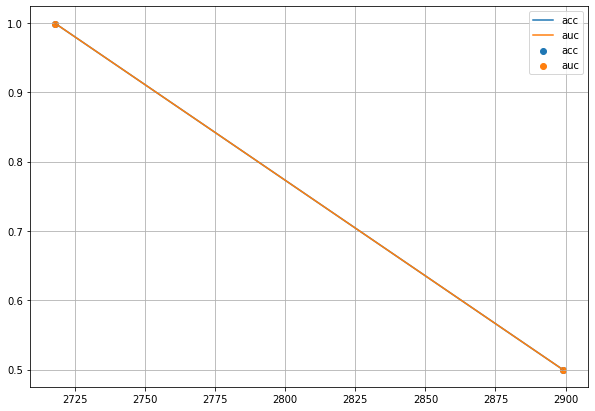

In [13]:
epochs = list(metric_data.keys())
epochs = sorted(epochs)
acc, auc = get_acc_auc(metric_data, epochs)
plt.figure(figsize=(10, 7))
plt.plot(epochs, acc, label='acc')
plt.scatter(epochs, acc, label='acc')
plt.plot(epochs, auc, label='auc')
plt.scatter(epochs, auc, label='auc')
plt.legend()
plt.grid('on')
plt.show()

In [14]:
metric_data

NameError: name 'metric_data' is not defined

In [14]:
metric_data

{2718: {'acc': 0.9990512333965844, 'auc': 0.9990512333965844},
 2899: {'acc': 0.5, 'auc': 0.5}}

In [13]:
human_df = pd.read_csv('testing_files\\final_64_q\\csv_conf\\model_epoch-2899\\output_model_epoch-2899_tp.csv')

In [14]:
human_df[human_df['max_conf'] != 1]

,Unnamed: 0,img_name,max_conf,iou,box
0,0,0_0_40_0.jpg,0,0,[]
1,1,100_0_40_3.jpg,0,0,[]
2,2,102_0_40_3.jpg,0,0,[]
3,3,106_0_30_0.jpg,0,0,[]
4,4,109_0_40_4.jpg,0,0,[]
...,...,...,...,...,...
522,522,v8_4_0_40_2.jpg,0,0,[]
523,523,v8_8_0_10_0.jpg,0,0,[]
524,524,v8_8_0_30_0.jpg,0,0,[]
525,525,v8_8_0_40_4.jpg,0,0,[]


In [13]:
human_df[human_df['iou'] < 0.5]

,Unnamed: 0,img_name,max_conf,iou,box
37,37,14_0_30_1.jpg,1,0.488227,"[5.060039520263672, 1.6139699220657349, 54.511..."
70,70,17_2_10_0.jpg,0,0.000000,[]
94,94,199_1_40_0.jpg,1,0.481062,"[36.9149284362793, 20.387514114379883, 61.2615..."
97,97,200_0_30_1.jpg,1,0.473399,"[13.949922561645508, 4.7501044273376465, 48.83..."
124,124,226_5_40_0.jpg,1,0.316397,"[40.886878967285156, 23.333084106445312, 61.36..."
135,135,30_1_40_1.jpg,0,0.000000,[]
188,188,7_1_40_0.jpg,1,0.411539,"[6.9177656173706055, 11.210983276367188, 38.06..."
189,189,7_2_10_0.jpg,0,0.000000,[]
209,209,a1_1_40_2.jpg,0,0.000000,[]


In [14]:
acc_json_names = os.listdir('testing_files\\opt_param2\\results\\json_acc_data')
auc_json_names = os.listdir('testing_files\\opt_param2\\results\\json_roc_auc_data')
result_dir = 'testing_files\\opt_param2\\results'

In [15]:
metric_data2 = load_metrics(acc_json_names, auc_json_names, result_dir)

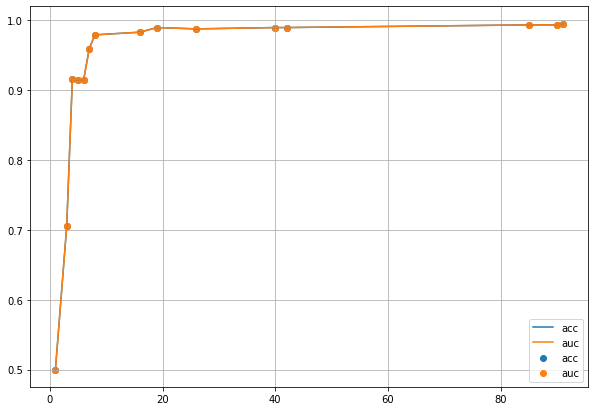

In [18]:
epochs = list(metric_data2.keys())
epochs = sorted(epochs)
acc, auc = get_acc_auc(metric_data2, epochs)
plt.figure(figsize=(10, 7))
plt.plot(epochs[:-1], acc[:-1], label='acc')
plt.scatter(epochs[:-1], acc[:-1], label='acc')
plt.plot(epochs[:-1], auc[:-1], label='auc')
plt.scatter(epochs[:-1], auc[:-1], label='auc')
plt.legend()
plt.grid('on')
plt.show()

In [17]:
metric_data2

{1: {'acc': 0.5, 'auc': 0.5},
 3: {'acc': 0.7049335863377609, 'auc': 0.7049335863377607},
 4: {'acc': 0.9155597722960152, 'auc': 0.9155597722960152},
 5: {'acc': 0.9146110056925996, 'auc': 0.9146110056925996},
 6: {'acc': 0.9146110056925996, 'auc': 0.9146110056925997},
 7: {'acc': 0.959203036053131, 'auc': 0.959203036053131},
 8: {'acc': 0.9791271347248577, 'auc': 0.9791271347248577},
 107: {'acc': 0.9933586337760911, 'auc': 0.9933586337760911},
 16: {'acc': 0.9829222011385199, 'auc': 0.9829222011385199},
 19: {'acc': 0.9895635673624289, 'auc': 0.9895635673624289},
 26: {'acc': 0.9876660341555977, 'auc': 0.9876660341555978},
 40: {'acc': 0.9895635673624289, 'auc': 0.9895635673624289},
 42: {'acc': 0.9895635673624289, 'auc': 0.9895635673624289},
 85: {'acc': 0.9933586337760911, 'auc': 0.9933586337760911},
 90: {'acc': 0.9933586337760911, 'auc': 0.9933586337760911},
 91: {'acc': 0.9952561669829222, 'auc': 0.9952561669829221}}

In [19]:
human_df = pd.read_csv('testing_files\\opt_param2\\csv_conf\\model_epoch-107\\output_model_epoch-107_tp.csv')

In [20]:
human_df[human_df['max_conf'] != 1]

,Unnamed: 0,img_name,max_conf,iou,box
70,70,17_2_10_0.jpg,0,0.0,[]
93,93,199_1_30_1.jpg,0,0.0,[]
189,189,7_2_10_0.jpg,0,0.0,[]
208,208,a1_1_10_0.jpg,0,0.0,[]
209,209,a1_1_40_2.jpg,0,0.0,[]


In [21]:
human_df[human_df['iou'] < 0.5]

,Unnamed: 0,img_name,max_conf,iou,box
20,20,11_1_30_0.jpg,1,0.104675,"[0.056874118745326996, 4.419942378997803, 11.0..."
61,61,171_0_30_0.jpg,1,0.268660,"[4.782779216766357, 5.273583889007568, 18.1392..."
70,70,17_2_10_0.jpg,0,0.000000,[]
93,93,199_1_30_1.jpg,0,0.000000,[]
94,94,199_1_40_0.jpg,1,0.293866,"[33.41838455200195, 18.058332443237305, 57.531..."
124,124,226_5_40_0.jpg,1,0.208072,"[38.79004669189453, 17.49777603149414, 60.6397..."
169,169,58_0_40_4.jpg,1,0.344415,"[17.5839786529541, 10.153746604919434, 33.4976..."
188,188,7_1_40_0.jpg,1,0.000000,"[28.96399688720703, 6.186246871948242, 56.5089..."
189,189,7_2_10_0.jpg,0,0.000000,[]
207,207,a0_1_30_1.jpg,1,0.330646,"[36.13614273071289, 7.213642597198486, 55.9548..."
